# Load and Inspect Dataset

## Load the data using pandas

In [1]:
import pandas as pd

# Load the CSV file
data = pd.read_csv('insurance.csv')

# Show the first 5 rows for a quick look
print(data.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


## Basic information about data

In [2]:
# Check dataset shape (rows, columns)
print('Dataset shape:', data.shape)

# Get column data types and non-null counts
print(data.info())

# Summary statistics of numeric columns
print(data.describe())

Dataset shape: (1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2

## Check for missing values

In [3]:
print('Missing values per column:')
print(data.isnull().sum())

Missing values per column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


## Understand columns / features

Age: Age of primary beneficiary (numeric)

Sex: Male or female (category)

BMI: Body mass index (numeric)

Children: Number of children covered by insurance (numeric)

Smoker: Whether patient smokes (category yes/no)

Region: Geographic region (category)

Charges: Medical insurance charges (numeric) — target variable

In [4]:
print('Unique values per categorical column:')
print('Sex:', data['sex'].unique())
print('Smoker:', data['smoker'].unique())
print('Region:', data['region'].unique())

Unique values per categorical column:
Sex: ['female' 'male']
Smoker: ['yes' 'no']
Region: ['southwest' 'southeast' 'northwest' 'northeast']


# Exploratory Data Analysis (EDA)

## Inspect feature distributions

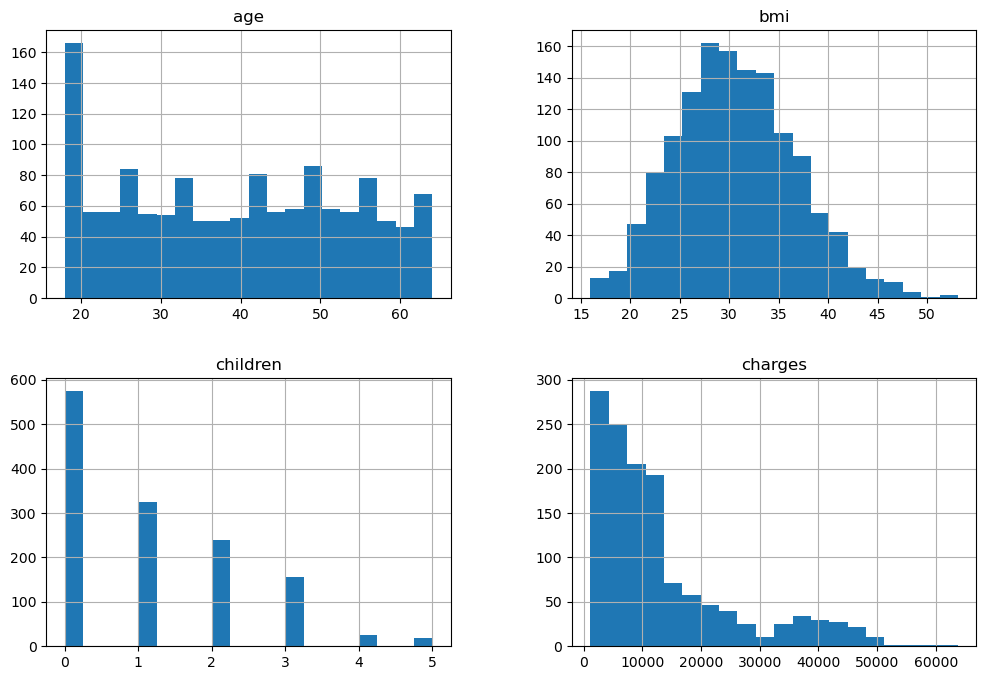

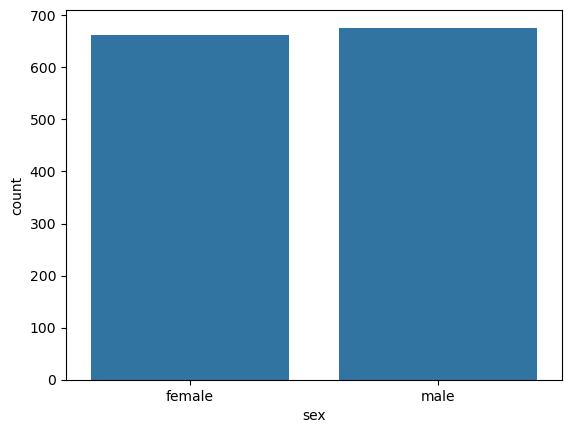

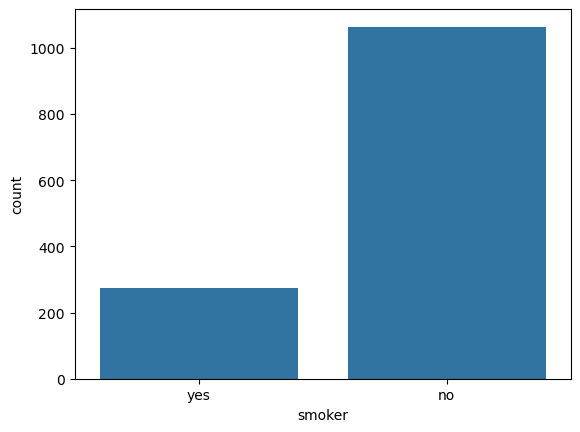

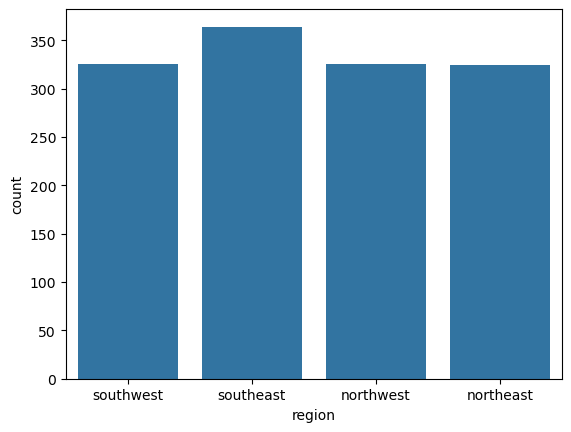

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Numeric histograms
numeric_features = ['age', 'bmi', 'children', 'charges']
data[numeric_features].hist(bins=20, figsize=(12, 8))
plt.show()

# Count plots for categorical
cat_features = ['sex', 'smoker', 'region']
for feature in cat_features:
    sns.countplot(x=feature, data=data)
    plt.show()

## Relationships between features and target

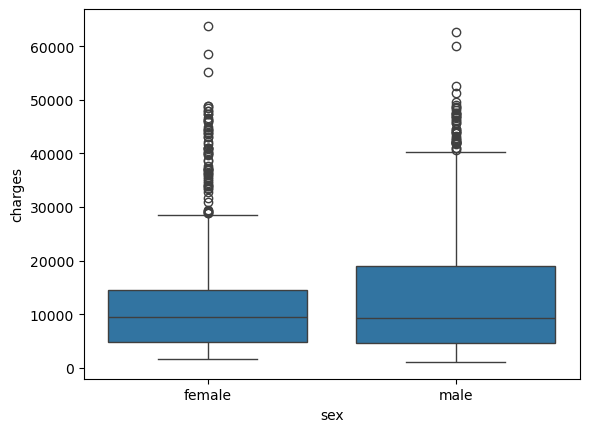

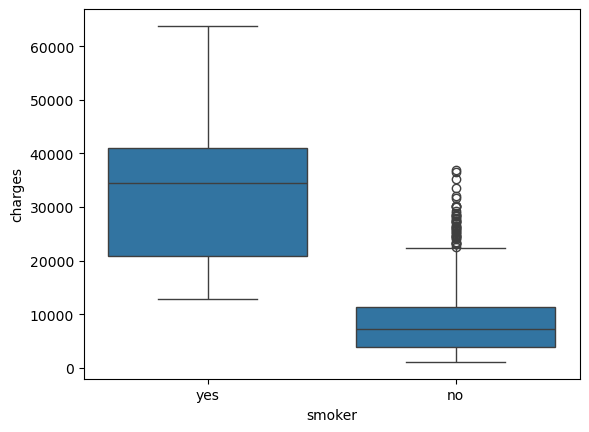

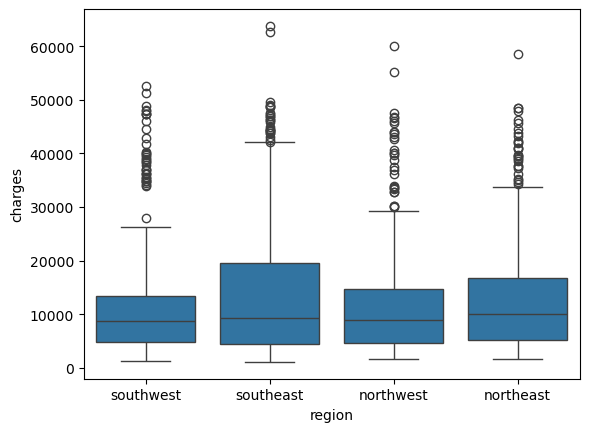

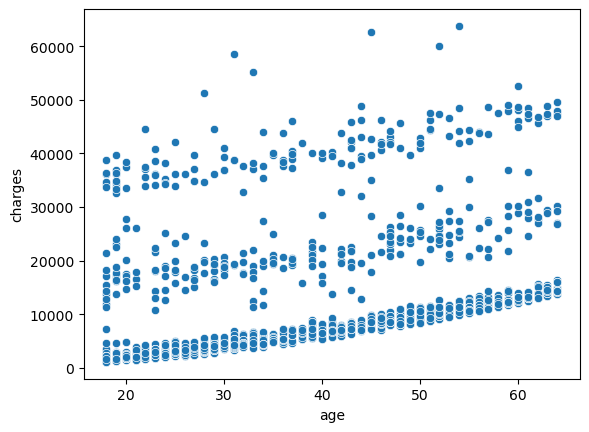

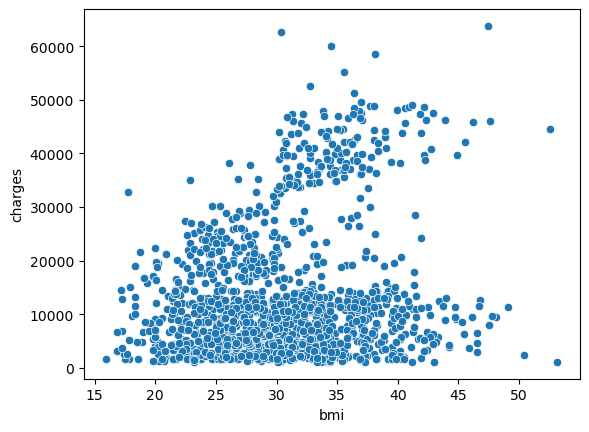

In [7]:
# Boxplots for categorical vs charges
for feature in cat_features:
    sns.boxplot(x=feature, y='charges', data=data)
    plt.show()

# Scatterplots for numeric vs charges
sns.scatterplot(x='age', y='charges', data=data)
plt.show()

sns.scatterplot(x='bmi', y='charges', data=data)
plt.show()

## Correlation matrix for numeric variables

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64


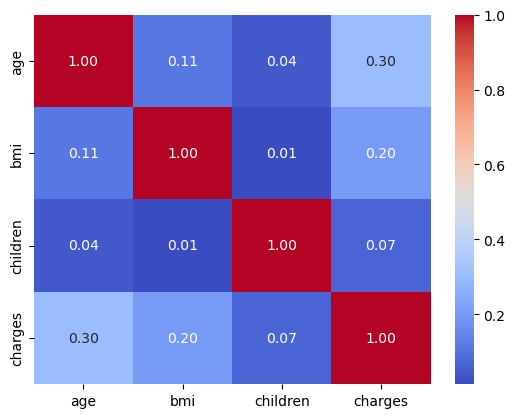

In [9]:
# Select only numeric columns before correlation calculation
corr_matrix = data.select_dtypes(include='number').corr()

# Display sorted correlation of all numeric columns with the target 'charges'
print(corr_matrix['charges'].sort_values(ascending=False))

# Plot heatmap of the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

#  Data Preprocessing and Feature Engineering

## Handle missing values

In [10]:
# Example check
print(data.isnull().sum())

# If missing values exist, impute (example)
from sklearn.impute import SimpleImputer
num_imputer = SimpleImputer(strategy='median')
data['bmi'] = num_imputer.fit_transform(data[['bmi']])

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


## Encode categorical variables|

In [11]:
# Label encoding for binary
data['sex'] = data['sex'].map({'male': 0, 'female': 1})
data['smoker'] = data['smoker'].map({'no': 0, 'yes': 1})

# One-hot encoding for 'region'
data = pd.get_dummies(data, columns=['region'], drop_first=True)

## Feature scaling

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_features = ['age', 'bmi', 'children']
data[numeric_features] = scaler.fit_transform(data[numeric_features])

## Transform target variable

In [13]:
import numpy as np
data['log_charges'] = np.log(data['charges'])

## Create interaction features

In [14]:
data['smoker_bmi'] = data['smoker'] * data['bmi']
data['smoker_age'] = data['smoker'] * data['age']

## Prepare features and target arrays

In [15]:
X = data.drop(['charges', 'log_charges'], axis=1)  # if log target used, drop charges
y = data['log_charges']  # or 'charges' if no log transform

# Modeling and Evaluation

## Train-test split

In [16]:
from sklearn.model_selection import train_test_split

X = data.drop(['charges', 'log_charges'], axis=1)  # features
y = data['log_charges']  # or 'charges'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Baseline model: Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# If log target, invert log for meaningful error metrics
if 'log_charges' in data.columns:
    y_test_exp = np.exp(y_test)
    y_pred_exp = np.exp(y_pred)
else:
    y_test_exp = y_test
    y_pred_exp = y_pred

print("RMSE:", np.sqrt(mean_squared_error(y_test_exp, y_pred_exp)))
print("MAE:", mean_absolute_error(y_test_exp, y_pred_exp))
print("R2:", r2_score(y_test_exp, y_pred_exp))

RMSE: 5378.566313430919
MAE: 2600.770241689897
R2: 0.8136604704592592


## Advanced models to improve accuracy

In [18]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
if 'log_charges' in data.columns:
    y_pred_rf_exp = np.exp(y_pred_rf)
else:
    y_pred_rf_exp = y_pred_rf

print("RF RMSE:", np.sqrt(mean_squared_error(y_test_exp, y_pred_rf_exp)))
print("RF MAE:", mean_absolute_error(y_test_exp, y_pred_rf_exp))
print("RF R2:", r2_score(y_test_exp, y_pred_rf_exp))

RF RMSE: 4357.454063708849
RF MAE: 2074.564835097141
RF R2: 0.8776968691796435


###  Cross-Validation for Model Evaluation

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

model = LinearRegression()  # define the model
scores = cross_val_score(model, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5)

print("Average RMSE:", -scores.mean())

Average RMSE: 0.3916071692252081


### Hyperparameter Tuning

In [23]:
#Grid Search (exhaustive)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Initialize your model
rf_model = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 10]
}

# Create GridSearchCV object with the model and param grid
grid = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5)

# Fit to your training data
grid.fit(X_train, y_train)

# Display best parameters and best score
print("Best parameters:", grid.best_params_)
print("Best RMSE:", -grid.best_score_)

Best parameters: {'max_depth': 5, 'n_estimators': 300}
Best RMSE: 0.3837758403533166


### Final Evaluation on Test Data

In [34]:
from sklearn.ensemble import RandomForestRegressor

best_model = RandomForestRegressor(n_estimators=100, random_state=42)  
best_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [26]:
y_pred_test = best_model.predict(X_test)

In [27]:
import numpy as np

if 'log_charges' in data.columns:
    y_test_exp = np.exp(y_test)
    y_pred_exp = np.exp(y_pred_test)
else:
    y_test_exp = y_test
    y_pred_exp = y_pred_test

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Test RMSE:", np.sqrt(mean_squared_error(y_test_exp, y_pred_exp)))
print("Test MAE:", mean_absolute_error(y_test_exp, y_pred_exp))
print("Test R2:", r2_score(y_test_exp, y_pred_exp))

Test RMSE: 4357.454063708849
Test MAE: 2074.564835097141
Test R2: 0.8776968691796435


In [29]:
best_model = grid.best_estimator_  

In [30]:
y_pred_test = best_model.predict(X_test)
if 'log_charges' in data.columns:
    y_test_exp = np.exp(y_test)
    y_pred_exp = np.exp(y_pred_test)
else:
    y_test_exp = y_test
    y_pred_exp = y_pred_test

print("Test RMSE:", np.sqrt(mean_squared_error(y_test_exp, y_pred_exp)))
print("Test MAE:", mean_absolute_error(y_test_exp, y_pred_exp))
print("Test R2:", r2_score(y_test_exp, y_pred_exp))


Test RMSE: 4386.563734845175
Test MAE: 2083.518972586799
Test R2: 0.8760573357671623


## Feature importance and interpretation

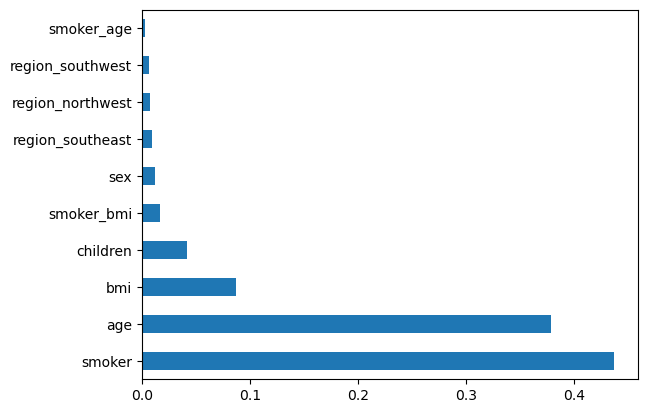

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()